In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import use
use('nbagg')

In [3]:
class FPU:
    """
    Metti qua le funzioni della classe
    """
    def __init__(self,N,t_steps,dt,alpha,beta,method,nmode):
        """
        Input:
        Output:
        """
        self.N       = N
        self.t_steps = t_steps
        self.dt      = dt
        self.alpha   = alpha
        self.beta    = beta 
        self.x       = np.sin(np.pi*np.arange(N+1)/(N+1))
        #self.x       = np.arange(N+1)*(1-np.arange(N+1)/(N+1))
        self.x       = np.append(self.x,[0])
        self.x_dot   = np.zeros(N+2)
        self.f1      = np.zeros(N+2)
        self.f2      = np.zeros(N+2)
        self.frc     = np.zeros(N+2)
        self.nmode   = nmode 
        self.method = method

        
    def force(self,pos):
        """
        Input:
        Output:
        """
        self.f2 = np.ediff1d(pos)
        self.f1 = np.ediff1d(pos[::-1])
        self.f1[0] = self.f2[0] = 0
        self.f2 = np.append(self.f2,[0])
        self.f1 = np.append(self.f1,[0])[::-1]
        
        if self.method == 0:
            frc = self.f2 + self.f1        
            
        elif self.method == 1:
            frc = self.f2 + self.f1 + self.alpha*(self.f2**2 - self.f1**2)  
            
        elif self.method == 2: 
            frc = self.f2 + self.f1 + self.beta*(self.f2**3 - self.f1**3) 
            
        return frc 
 

    def e_tot(self):
        """
        Input:
        Output:
        """
        
        return 0.5*np.sum( self.x_dot**2 + self.f1**2 + self.f2**2)
    
    def e_k(self):
        """
        Input:
        Output:
        """
        kappa = np.arange(1,self.nmode+1).reshape(-1,1)
        ind_i = np.arange(self.N+2).reshape(-1,1).transpose()
        vecx = self.x.reshape(-1,1)
        vecx_dot = self.x_dot.reshape(-1,1)
        fterm = np.sin(np.dot(kappa,ind_i)*np.pi/self.N)
        ak = np.dot(fterm,vecx)
        ak_dot = np.dot(fterm,vecx_dot)
        
        return 0.5*(ak_dot**2+(2*ak*np.sin(kappa*np.pi/(2*self.N)))**2)
    
    def verlet(self):
        """
        Input:
        Output:
        """
        vecchia = np.copy(self.x)
        self.frc = self.force(self.x)
        self.x += self.x_dot*self.dt + 0.5*self.frc*(self.dt**2)
        self.x_dot = (self.x-vecchia)/self.dt
        self.x[0] = self.x[-1] = 0
        self.x_dot[0] = self.x_dot[-1] = 0
        eddai = self.e_tot()
        return eddai 
    
    
    def rk4(self):
        dt2 = self.dt/2
        dt3 = self.dt/3
        dt6 = self.dt/6
        
        qi  = np.copy(self.x)
        pi  = np.copy(self.x_dot)
        k1q = np.copy(pi)
        k1p = self.force(qi)
        
        qi  = self.x + k1q*dt2
        pi  = self.x_dot + k1p*dt2
        k2q = np.copy(pi) 
        k2p = self.force(qi)
        
        qi  = self.x + k2q*dt2
        pi  = self.x_dot + k2p*dt2
        k3q = np.copy(pi) 
        k3p = self.force(qi)
        
        qi  = self.x + k3q*dt
        pi  = self.x_dot + k3p*dt
        k4q = np.copy(pi) 
        k4p = self.force(qi)
        
        self.x += dt6*k1q + dt3*k2q + dt3*k3q + dt6*k4q
        self.x_dot += dt6*k1p + dt3*k2p + dt3*k3p + dt6*k4p
        
        return self.e_k() 
        
    
    
    def integrate(self,ene, ene_k):
        """
        Input:
        Output:
        """
        fig, ax = plt.subplots()
        enek = np.zeros(nmode)
        for i in range(self.t_steps):
            ek = self.rk4().reshape(-1,1)
            ene_k[i,:] = np.copy(ek.reshape(-1,))
            if i % 200 == 0:
                ax.set_ylim([-1,1])
                ax.scatter(np.arange(self.x.shape[0]),self.x, color = 'blue')
                ax.grid()
                
                
        

In [4]:
N = 32
t_steps = 5000
dt = 1/np.sqrt(8)
alpha = 0.25
beta = 5
method = 1
nmode = 5
energy = np.zeros(t_steps)
energy_k = np.zeros((t_steps,nmode))
prova = FPU(N,t_steps,dt,alpha,beta,method,nmode)

<IPython.core.display.Javascript object>


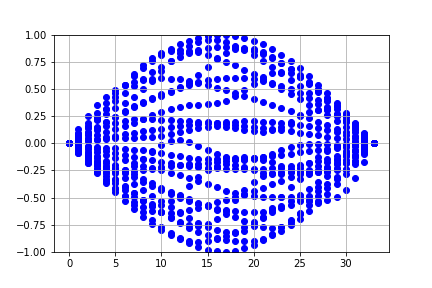

In [5]:
prova.integrate(energy,energy_k)

<IPython.core.display.Javascript object>


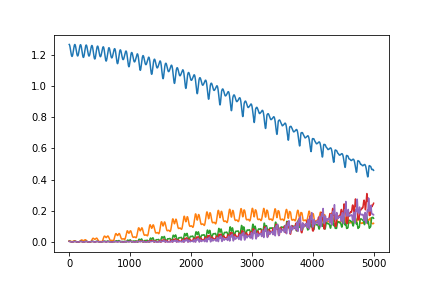

In [6]:
fig1, ax1 = plt.subplots()
for i in range(nmode):
    
    ax1.plot(energy_k[:,i])

In [9]:
fft_ene = np.fft.fftshift(np.fft.fft(np.fft.fftshift(energy_k),axis=0))

<IPython.core.display.Javascript object>


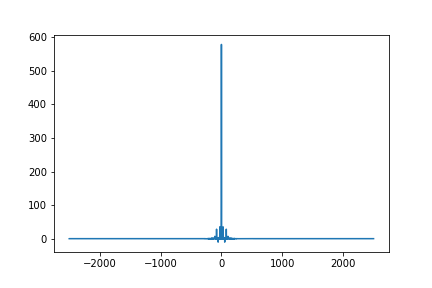

In [23]:
fig2, ax2 = plt.subplots()
ax2.plot(np.linspace(-2500,2500,5000),np.imag(fft_ene[:,0]))

In [4]:
a = np.arange(20).reshape(5,4)
print(a)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [3]:
np.sum(a,axis=1)

array([ 6, 22, 38, 54, 70])

In [77]:
b.shape

(10, 1)

In [78]:
b*a

array([[ 0],
       [ 1],
       [ 4],
       [ 9],
       [16],
       [25],
       [36],
       [49],
       [64],
       [81]])

In [ ]:
a = np.sin()

In [50]:
np.dot(a,b)

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 0,  2,  4,  6,  8, 10, 12, 14],
       [ 0,  3,  6,  9, 12, 15, 18, 21],
       [ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 0,  5, 10, 15, 20, 25, 30, 35],
       [ 0,  6, 12, 18, 24, 30, 36, 42],
       [ 0,  7, 14, 21, 28, 35, 42, 49],
       [ 0,  8, 16, 24, 32, 40, 48, 56],
       [ 0,  9, 18, 27, 36, 45, 54, 63]])